In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definitions

In [2]:
Mp = 0.9383
Md = 1.876
Me = 0.511E-3
ne = 3
Ei = [5, 10, 18] #Electron Beam Energy in GeV
Di = [82, 220, 220] #Deuteron Beam Energy in GeV (= twice energy-per-nucleon 41,110)
mu_p = (2.79285)
alpha = (1./137.036)

In [3]:
#Eta Variable
def eta(Q2):
    return Q2/(4.*Md*Md)

In [4]:
#GC -- Abbott Parameterization I
def GC(Q2):

    Q_fm = np.sqrt(Q2)*(1./0.1973) #Q in fm^-1

    G_0 = 1.
    Q_0 = 4.21
    a = [6.740E-01, 2.246E-02, 9.806E-03, -2.709E-04, 3.793E-06]

    poly = 1.
    
    for i in range(0, len(a)):
        poly += a[i]*np.power(Q_fm,2*(i+1))

    GC = G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    return GC

In [5]:
#GQ -- Abbott Parameterization I
def GQ(Q2):

    Q_fm = np.sqrt(Q2)*(1./0.1973) #Q in fm^-1

    G_0 = 25.83
    Q_0 = 8.1
    a = [.796E-01, -5.656E-02, 1.933E-02, -6.734E-04, 9.438E-06]

    poly = 1.
    
    for i in range(0, len(a)):
        poly += a[i]*np.power(Q_fm,2*(i+1))

    GQ = G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    return GQ

In [8]:
#GM -- Abbott Parameterization I
def GM(Q2):

    Q_fm = np.sqrt(Q2)*(1./0.1973) #Q in fm^-1

    G_0 = 1.714
    Q_0 = 7.37
    a = [5.804E-01, 8.701E-02, -3.624E-03, 3.448E-04, -2.818E-06]

    poly = 1.
    
    for i in range(0, len(a)):
        poly += a[i]*np.power(Q_fm,2*(i+1))

    GM = G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    return GM

In [11]:
#GM -- Abbott Parameterization I -- modified to a linear function for 3.5<Q2<6
def GM_Mod(Q2):

    G_0 = 1.714
    Q_0 = 7.37
    a = [5.804E-01, 8.701E-02, -3.624E-03, 3.448E-04, -2.818E-06]

    if(Q2<3.5 or Q2>6):

        Q_fm = np.sqrt(Q2)*(1./0.1973) #Q in fm^-1

        poly = 1.

        for i in range(0, len(a)):
            poly += a[i]*np.power(Q_fm,2*(i+1))

        GM = G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
        return GM
    else:
        Q_low = np.sqrt(3.5)*(1./0.1973)
        Q_hi = np.sqrt(6.0)*(1./0.1973)
        
        poly_low = 1.

        for i in range(0, len(a)):
            poly_low += a[i]*np.power(Q_low,2*(i+1))
            
        poly_hi = 1.

        for i in range(0, len(a)):
            poly_hi += a[i]*np.power(Q_hi,2*(i+1))

        GM_low = G_0 * (1. - np.power((Q_low/Q_0),2)) * (1./poly_low)
        GM_hi = G_0 * (1. - np.power((Q_hi/Q_0),2)) * (1./poly_hi)
        return (GM_hi-GM_low)*((Q2-3.5)/(6.-3.5)) + GM_low

In [9]:
#A -- Abbott Parameterization I
def A_d(Q2):
    return np.power(GC(Q2),2) + (8./9.)*eta(Q2)*eta(Q2)*np.power(GQ(Q2),2) + (2./3.)*eta(Q2)*np.power(GM(Q2),2)

In [10]:
#B -- Abbott Parameterization I
def B_d(Q2):
      return (4./3.)*eta(Q2)*(1.+eta(Q2))*np.power(GM(Q2),2)

In [11]:
#A -- Abbott Parameterization I w/Modified GM
def A_d_M(Q2):
    return np.power(GC(Q2),2) + (8./9.)*eta(Q2)*eta(Q2)*np.power(GQ(Q2),2) + (2./3.)*eta(Q2)*np.power(GM_Mod(Q2),2)

In [12]:
#B -- Abbott Parameterization I w/Modified GM
def B_d_M(Q2):
    return (4./3.)*eta(Q2)*(1.+eta(Q2))*np.power(GM_Mod(Q2),2)

In [13]:
#A -- Long Parameterization
def A_d_L(Q2):

    a = [-1.85931e-02, -1.37215e+01, 3.23622e+01, -4.29740e+01]
    b = [-2.68235,-1.47849,0.0782541]

    exp1 = a[0] + a[1]*Q2 + a[2]*np.power(Q2,2) + a[3]*np.power(Q2,3)
    exp2 = b[0] + b[1]*Q2 + b[2]*np.power(Q2,2)

    return np.power(10,exp1) + np.power(10,exp2)

In [14]:
#B -- Long Parameterization
def B_d_L(Q2):

    b = [-2.26938, -3.18194, 0.147926]
    exp1 = b[0] + b[1]*Q2 + b[2]*np.power(Q2,2)

    return np.power(10,exp1)

In [15]:
#T20 -- Abbott I w/Modified GM
#theta is in degrees in initial deuteron rest frame
#For plotting, we will show theta=70 degrees...as is standard
def T20(Q2, theta):

    theta_rad = np.radians(theta)

    S = A_d_M(Q2) + np.power(tan(theta_rad/2.),2)*B_d_M(Q2)
    epsilon = (1.+eta(Q2)) * np.power(np.tan(theta_rad/2.),2)

    T20 = -1.*( np.sqrt(2.)*eta(Q2)/(3.*S) )
    T20 *= ( 4*GC(Q2)*GQ(Q2) + (4.*eta(Q2)/3.)*GQ(Q2)*GQ(Q2) + ((1./2.) + epsilon)*GM_Mod(Q2)*GM_Mod(Q2) )
    
    return T20

In [16]:
#T21 -- Abbott I w/Modified GM
#theta is in degrees in initial deuteron rest frame
#For plotting, we will show theta=70 degrees...as is standard
def T21(Q2, theta):

    theta_rad = np.radians(theta)

    S = A_d_M(Q2) + np.power(np.tan(theta_rad/2.),2)*B_d_M(Q2)
    epsilon = (1.+eta(Q2)) * np.power(np.tan(theta_rad/2.),2)

    T21 = (2./S) * sqrt( np.power(eta(Q2),3)*(1.+epsilon )/3. ) * GQ(Q2) * GM_Mod(Q2)

    return T21

In [17]:
#T22 -- Abbott I w/Modified GM
#theta is in degrees in initial deuteron rest frame
#For plotting, we will show theta=70 degrees...as is standard
def T22(Q2, theta):
  
    theta_rad = np.radians(theta)

    S = A_d_M(Q2) + np.power(np.tan(theta_rad/2.),2)*B_d_M(Q2)

    T22 = ( eta(Q2)/(2.*np.sqrt(3.)*S) )  * GM_Mod(Q2) * GM_Mod(Q2)

    return T22

In [18]:
#Elastic Differential Cross Section dsigma/dQ2
#Will return cs in pb/GeV^2
def diff_cs(x, par):

    Q2 = x[0]

    index = par[0];
    y = Q2/( 4.*Ei[index] * Di[index] ); #Ignoring Masses

    dsig_dQ2 = 0

    if(y<=1):
        dsig_dQ2 = 4.*np.pi*alpha*alpha/(np.power(Q2,2))

        if( np.abs(par[1])<1E-4 ):
            dsig_dQ2 = dsig_dQ2*( A_d(Q2)*(1.-y-(Md*Md*y*y/Q2)) + B_d(Q2)*(y*y/(4*eta(Q2))) ); #Abbott I
        elif( np.abs(par[1]-1.)<1E-4 ):
            dsig_dQ2 = dsig_dQ2*( A_d_M(Q2)*(1.-y-(Md*Md*y*y/Q2)) + B_d_M(Q2)*(y*y/(4*eta(Q2))) ); #Abbott I w/ Modified GM
        elif( np.abs(par[1]-2.)<1E-4 ):
            dsig_dQ2 = dsig_dQ2*( A_d_L(Q2)*(1.-y-(Md*Md*y*y/Q2)) + B_d_L(Q2)*(y*y/(4*eta(Q2))) ); #Long Fit

        dsig_dQ2 = dsig_dQ2*0.3894*1e9;
    else:
        dsig_dQ2 = 0;

    return dsig_dQ2


# Graphing

In [19]:
#Read in data file and put into graph
#Assumes file is in format x,y,yerr
#For Form-Factors, have option to draw absolute value
def Data_Graph(infile, abso = False):

    #Create graph
    fig, ax = plt.subplots()

    #Read input file
    in_data = np.loadtxt(infile)

    #Write to Graph
    x = in_data[:, 0]
    y = in_data[:, 1]
    ey = in_data[:, 2]
    
    if(abso):
        y = np.abs(y)
    
    ax.errorbar(x, y, yerr = ey, fmt='o')

    print('We read {} lines from data file {} !'.format(in_data.shape[0], infile))
    return ax

In [20]:
#ax.set_yscale('log')

In [21]:
#Read in data file and put into graph (TGraphAsymmErrors)
#Assumes file is in format x,y,yerr_hi,yerr_low
#For Form-Factors, have option to draw absolute value
def Data_Graph_Asymm(infile, abso = False):

    #Create graph
    fig, ax = plt.subplots()

    #Read input file
    in_data = np.loadtxt(infile)

    #Write to Graph
    x = in_data[:, 0]
    y = in_data[:, 1]
    ey_hi = in_data[:, 2]
    ey_low = in_data[:, 3]
    
    if(abso):
        for i in range(0, len(y)):
            if(y[i] <= 0):
                temporary = ey_low[i]
                ey_low[i] = ey_hi[i]
                ey_hi[i] = temporary
            y[i] = np.abs(y[i])
    
    ax.errorbar(x, y, yerr=[ey_low, ey_hi], fmt='o')

    print('We read {} lines from data file {} !'.format(in_data.shape[0], infile))
    return ax

# Main

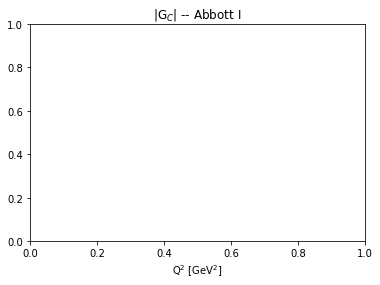

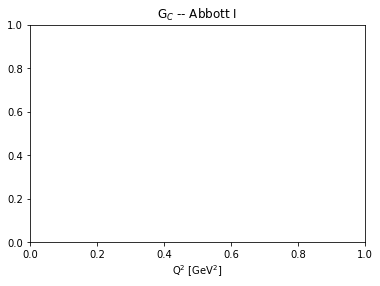

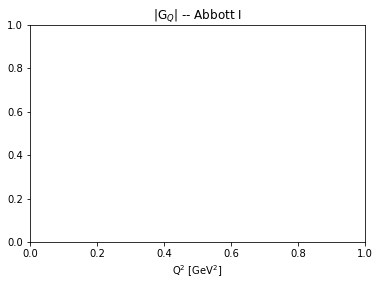

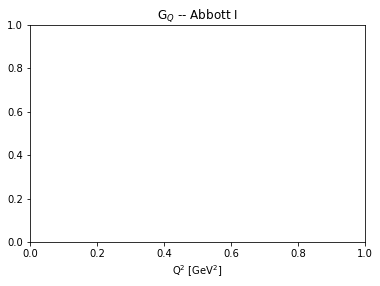

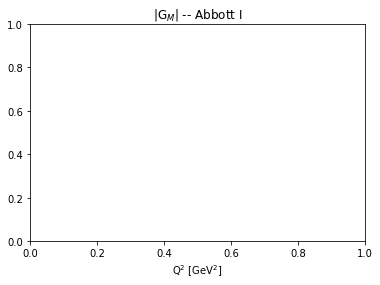

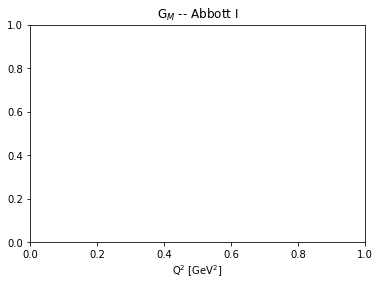

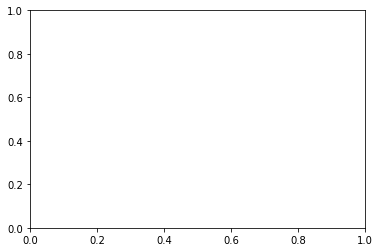

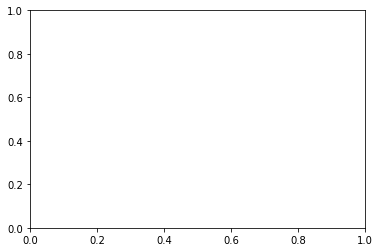

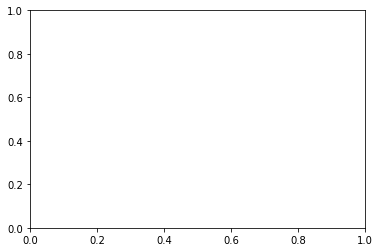

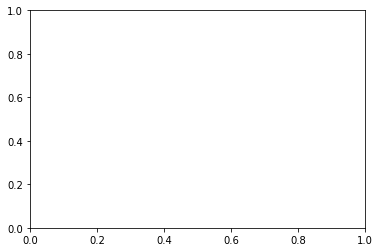

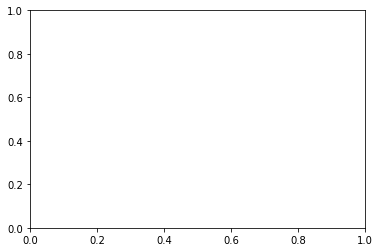

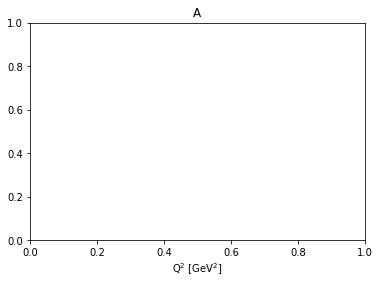

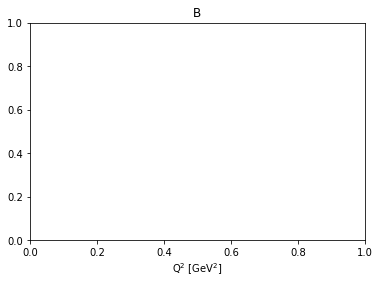

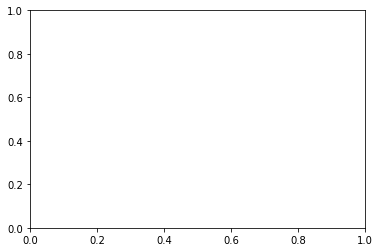

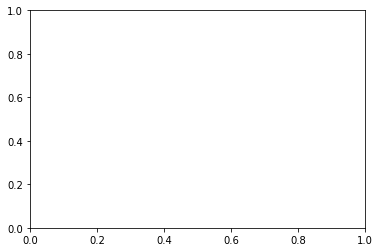

In [22]:
#Set ROOT Style
# gStyle->SetPadBorderMode(0);
# gStyle->SetFrameBorderMode(0);
# gStyle->SetFrameLineWidth(2);
# gStyle->SetOptStat(0);
# gStyle->SetNdivisions(405,"X");
# gStyle->SetNdivisions(405,"Y");
# gStyle->SetLabelSize(0.05,"X");
# gStyle->SetLabelSize(0.05,"Y");
# gStyle->SetLabelOffset(0.01,"X");
# gStyle->SetLabelOffset(0.01,"Y");
# gStyle->SetTitleXSize(0.05);
# gStyle->SetTitleXOffset(0.8);
# gStyle->SetTitleYSize(0.055);
# gStyle->SetTitleYOffset(0.9);

# TF1 *f1[ne], *f2[ne], *f3[ne];
# TGraph *gr1[ne],*gr2[ne],*gr3[ne],*gr4[ne],*gr5[ne],*gr6[ne];
# TGraph *gr4a[ne],*gr6a[ne];
# TGraph *g_cs1[ne],*g_cs2[ne],*g_cs3[ne];

#Form Factors
#Log
# TGraph *g_gc = new TGraph();
# g_gc->SetLineColor(kBlue);
# g_gc->SetLineWidth(3);
# g_gc->GetXaxis()->CenterTitle();
# g_gc->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_gc->SetTitle("|G_{C}| -- Abbott I");
g_gc_fig, g_gc_ax = plt.subplots()
g_gc_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_gc_ax.set_title('|G$_{C}$| -- Abbott I')

#Linear
# TGraph *g_gcl = new TGraph();
# g_gcl->SetLineColor(kBlue);
# g_gcl->SetLineWidth(3);
# g_gcl->GetXaxis()->CenterTitle();
# g_gcl->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_gcl->SetTitle("G_{C} -- Abbott I");
g_gcl_fig, g_gcl_ax = plt.subplots()
g_gcl_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_gcl_ax.set_title('G$_{C}$ -- Abbott I')

#Log
# TGraph *g_gq = new TGraph();
# g_gq->SetLineColor(kBlue);
# g_gq->SetLineWidth(3);
# g_gq->GetXaxis()->CenterTitle();
# g_gq->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_gq->SetTitle("|G_{Q}| -- Abbott I");
g_gq_fig, g_gq_ax = plt.subplots()
g_gq_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_gq_ax.set_title('|G$_{Q}$| -- Abbott I')

#Linear
# TGraph *g_gql = new TGraph();
# g_gql->SetLineColor(kBlue);
# g_gql->SetLineWidth(3);
# g_gql->GetXaxis()->CenterTitle();
# g_gql->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_gql->SetTitle("G_{Q} -- Abbott I");
g_gql_fig, g_gql_ax = plt.subplots()
g_gql_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_gql_ax.set_title('G$_{Q}$ -- Abbott I')

#Log
# TGraph *g_gm = new TGraph();
# g_gm->SetLineColor(kBlue);
# g_gm->SetLineWidth(3);
# g_gm->GetXaxis()->CenterTitle();
# g_gm->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_gm->SetTitle("|G_{M}| -- Abbott I");
g_gm_fig, g_gm_ax = plt.subplots()
g_gm_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_gm_ax.set_title('|G$_{M}$| -- Abbott I')

#Linear
# TGraph *g_gml = new TGraph();
# g_gml->SetLineColor(kBlue);
# g_gml->SetLineWidth(3);
# g_gml->GetXaxis()->CenterTitle();
# g_gml->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_gml->SetTitle("G_{M} -- Abbott I");
g_gml_fig, g_gml_ax = plt.subplots()
g_gml_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_gml_ax.set_title('G$_{M}$ -- Abbott I')

#Abbott I -- Modified (Log)
# TGraph *g_gm_mod = new TGraph();
# g_gm_mod->SetLineColor(kGreen);
# g_gm_mod->SetLineWidth(3);
g_gm_mod_fig, g_gm_mod_ax = plt.subplots()

#Abbott I -- Modified (Linear)
# TGraph *g_gm_modl = new TGraph();
# g_gm_modl->SetLineColor(kGreen);
# g_gm_modl->SetLineWidth(3);
g_gm_modl_fig, g_gm_modl_ax = plt.subplots()

#Abbott I -- Modified
# TGraph *g_t20 = new TGraph();
# g_t20->SetLineColor(kGreen);
# g_t20->SetLineWidth(3);
g_t20_fig, g_t20_ax = plt.subplots()

#Abbott I -- Modified
# TGraph *g_t21 = new TGraph();
# g_t21->SetLineColor(kGreen);
# g_t21->SetLineWidth(3);
g_t21_fig, g_t21_ax = plt.subplots()

#Abbott I -- Modified
# TGraph *g_t22 = new TGraph();
# g_t22->SetLineColor(kGreen);
# g_t22->SetLineWidth(3);
g_t22_fig, g_t22_ax = plt.subplots()

#Abbott I -- Modified
# TGraph *g_a1 = new TGraph();
# g_a1->SetLineColor(kGreen);
# g_a1->SetLineWidth(3);
# g_a1->GetXaxis()->CenterTitle();
# g_a1->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_a1->SetTitle("A");
g_a1_fig, g_a1_ax = plt.subplots()
g_a1_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_a1_ax.set_title('A')

#Abbott I -- Modified
# TGraph *g_b1 = new TGraph();
# g_b1->SetLineColor(kGreen);
# g_b1->SetLineWidth(3);
# g_b1->GetXaxis()->CenterTitle();
# g_b1->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
# g_b1->SetTitle("B");
g_b1_fig, g_b1_ax = plt.subplots()
g_b1_ax.set_xlabel('Q$^{2}$ [GeV$^{2}$]')
g_b1_ax.set_title('B')

#Long
# TGraph *g_a2 = new TGraph();
# g_a2->SetLineColor(kRed);
# g_a2->SetLineWidth(3);
g_a2_fig, g_a2_ax = plt.subplots()

#Long
# TGraph *g_b2 = new TGraph();
# g_b2->SetLineColor(kRed);
# g_b2->SetLineWidth(3);
g_b2_fig, g_b2_ax = plt.subplots()

In [ ]:
#Data&Theory Files
print('-------------------------------')
g_data_A = Data_Graph("input_files/A_data.txt");
Tg_data_B = Data_Graph("input_files/B_data.txt");
g_theory_GC = Data_Graph("input_files/IAMEC_GC.txt", True);
g_theory_GQ = Data_Graph("input_files/IAMEC_GQ.txt", True);
g_theory_GM = Data_Graph("input_files/IAMEC_GM.txt", True);
g_theory_A = Data_Graph("input_files/IAMEC_A.txt");
g_theory_B = Data_Graph("input_files/IAMEC_B.txt");
g_data_GC = Data_Graph_Asymm("input_files/GC_data.txt", True);
g_data_GQ = Data_Graph_Asymm("input_files/GQ_data.txt", True);
g_data_GM = Data_Graph_Asymm("input_files/GM_data.txt", True);
g_data_T20 = Data_Graph("input_files/T20_Data.txt");
g_data_T21 = Data_Graph("input_files/T21_Data.txt");
g_data_T22 = Data_Graph("input_files/T22_Data.txt");
g_theory_T20 = Data_Graph("input_files/IAMEC_T20.txt");
g_theory_T21 = Data_Graph("input_files/IAMEC_T21.txt");
g_theory_T22 = Data_Graph("input_files/IAMEC_T22.txt");
print('-------------------------------')

In [24]:
# for(Int_t k=0;k<ne;k++){

#     Double_t s_cm = 4*Ei[k]*Di[k]; //Square of Electron-Deuteron COM Energy (Ignore Masses)

#     //Electron-Deuteron Differential Cross Section in pb/GeV^2
    f1[k] = new TF1(Form("f1[%d]",k),diff_cs,0.01,15,2); //Abbott I
    TF1('f1[{}]'.format(k), diff_cs, )
#     f1[k]->SetParameter(0,k);
#     f1[k]->SetParameter(1,0);
#     f1[k]->SetLineWidth(2);f1[k]->SetLineColor(k+1);

#     f2[k] = new TF1(Form("f2[%d]",k),diff_cs,0.01,15,2); //Abbott I -- Modified
#     f2[k]->SetParameter(0,k);
#     f2[k]->SetParameter(1,1);
#     f2[k]->SetLineWidth(2);f2[k]->SetLineColor(k+1);

#     f3[k] = new TF1(Form("f3[%d]",k),diff_cs,0.01,15,2); //Long Fit
#     f3[k]->SetParameter(0,k);
#     f3[k]->SetParameter(1,2);
#     f3[k]->SetLineWidth(2);f3[k]->SetLineColor(k+1);

#     //Luminosity in pb^-1 (100 fb^-1 lum in terms of nucleons -> 50 fb^-1 for deuteron)
#     const Double_t lum = 50E3;

#     //Make plots
#     //Plotting Variables
#     Double_t Q2_plot(0),y_plot(0),epsilon_plot(0);
#     Double_t ef_e_plot(0),ef_theta_plot(0),df_e_plot(0),df_theta_plot(0);
#     Double_t Q2_low(0),y_low(0),ef_theta_low(0),df_theta_low(0);

#     //TGraphs
#     gr1[k] = new TGraph(); //Q2 vs. y_d
#     gr1[k]->SetLineWidth(2);gr1[k]->SetLineColor(k+1);

#     gr2[k] = new TGraph(); //Q2 vs. epsilon_d
#     gr2[k]->SetLineWidth(2);gr2[k]->SetLineColor(k+1);

#     gr3[k] = new TGraph(); //Q2 vs. ef_e
#     gr3[k]->SetLineWidth(2);gr3[k]->SetLineColor(k+1);

#     gr4[k] = new TGraph(); //Q2 vs. ef_theta
#     gr4[k]->SetLineWidth(2);gr4[k]->SetLineColor(k+1);

#     gr4a[k] = new TGraph(); //Q2 vs. ef_theta (Q2<1)
#     gr4a[k]->SetLineWidth(2);gr4a[k]->SetLineColor(k+1);

#     gr5[k] = new TGraph(); //Q2 vs. df_e
#     gr5[k]->SetLineWidth(2);gr5[k]->SetLineColor(k+1);

#     gr6[k] = new TGraph(); //Q2 vs. df_theta
#     gr6[k]->SetLineWidth(2);gr6[k]->SetLineColor(k+1);

#     gr6a[k] = new TGraph(); //Q2 vs. df_theta (Q2<1)
#     gr6a[k]->SetLineWidth(2);gr6a[k]->SetLineColor(k+1);

#     g_cs1[k] = new TGraph(); //Cross Section vs. Q2
#     g_cs1[k]->SetLineWidth(2);g_cs1[k]->SetLineColor(k+1);

#     g_cs2[k] = new TGraph(); //Cross Section vs. Q2
#     g_cs2[k]->SetLineWidth(2);g_cs2[k]->SetLineColor(k+1);

#     g_cs3[k] = new TGraph(); //Cross Section vs. Q2
#     g_cs3[k]->SetLineWidth(2);g_cs3[k]->SetLineColor(k+1);

#     Double_t *vec_index = new Double_t[2];

#     for(Int_t i=0;i<1500;i++){

#         Q2_plot = (i+1)*0.01;
#         y_plot = Q2_plot / s_cm ; //x_d=1 for elastic (again ignoring masses)

#         //This is epsilon_d. I ignore gamma**2 terms here. Even though gamma**2 can be large at small Q2,
#         //this corresponds to extremely small y; at very Q^2, gamma**2 is small.
#         epsilon_plot = (1.-y_plot) / ( 1.-y_plot+(y_plot*y_plot/2.) ); 

#         ef_e_plot = (1. - y_plot)*Ei[k] + y_plot*Di[k];
#         ef_theta_plot = TMath::RadToDeg() * TMath::ACos( (y_plot*Di[k] - (1.-y_plot)*Ei[k])/(y_plot*Di[k] + (1.-y_plot)*Ei[k]) );
#         df_e_plot = y_plot*Ei[k] + (1.-y_plot)*Di[k];
#         df_theta_plot = TMath::RadToDeg() * TMath::ACos( (-y_plot*Ei[k] + (1.-y_plot)*Di[k])/(y_plot*Ei[k] + (1.-y_plot)*Di[k]) );

#         if(y_plot<=1){
#             gr1[k]->SetPoint(i,Q2_plot,y_plot);
#             gr2[k]->SetPoint(i,Q2_plot,epsilon_plot);

#             gr3[k]->SetPoint(i,Q2_plot,ef_e_plot);
#             gr4[k]->SetPoint(i,Q2_plot,ef_theta_plot);
#             gr5[k]->SetPoint(i,Q2_plot,df_e_plot);
#             gr6[k]->SetPoint(i,Q2_plot,df_theta_plot);

#             vec_index[0] = (Double_t) k;
#             vec_index[1] = (Double_t) 0;
#             g_cs1[k]->SetPoint(i,Q2_plot,diff_cs(&Q2_plot,vec_index));
#             vec_index[1] = (Double_t) 1;
#             g_cs2[k]->SetPoint(i,Q2_plot,diff_cs(&Q2_plot,vec_index));
#             vec_index[1] = (Double_t) 2;
#             g_cs3[k]->SetPoint(i,Q2_plot,diff_cs(&Q2_plot,vec_index));

#             if(k==0){
#                 g_gc->SetPoint(i,Q2_plot,fabs(GC(Q2_plot)));
#                 g_gcl->SetPoint(i,Q2_plot,GC(Q2_plot));
#                 g_gq->SetPoint(i,Q2_plot,fabs(GQ(Q2_plot)));
#                 g_gql->SetPoint(i,Q2_plot,GQ(Q2_plot));
#                 g_gm->SetPoint(i,Q2_plot,fabs(GM(Q2_plot)));
#                 g_gml->SetPoint(i,Q2_plot,GM(Q2_plot));
#                 g_gm_mod->SetPoint(i,Q2_plot,fabs(GM_Mod(Q2_plot)));
#                 g_gm_modl->SetPoint(i,Q2_plot,GM_Mod(Q2_plot));
#                 g_t20->SetPoint(i,Q2_plot, T20(Q2_plot,70.) );
#                 g_t21->SetPoint(i,Q2_plot, T21(Q2_plot,70.) );
#                 g_t22->SetPoint(i,Q2_plot, T22(Q2_plot,70.) );

#                 g_a1->SetPoint(i,Q2_plot,A_d_M(Q2_plot));
#                 g_b1->SetPoint(i,Q2_plot,B_d_M(Q2_plot));
#                 g_a2->SetPoint(i,Q2_plot,A_d_L(Q2_plot));
#                 g_b2->SetPoint(i,Q2_plot,B_d_L(Q2_plot));
#             }

#         }

#         //Do low Q2
#         Q2_low = 0.01+i*6.6e-4;
#         y_low = Q2_low / s_cm ;
#         ef_theta_low = TMath::RadToDeg() * TMath::ACos( (y_low*Di[k] - (1.-y_low)*Ei[k])/(y_low*Di[k] + (1.-y_low)*Ei[k]) );
#         df_theta_low = TMath::RadToDeg() * TMath::ACos( (-y_low*Ei[k] + (1.-y_low)*Di[k])/(y_low*Ei[k] + (1.-y_low)*Di[k]) );

#         if(y_plot<=1){
#             gr4a[k]->SetPoint(i,Q2_low,ef_theta_low);
#             gr6a[k]->SetPoint(i,Q2_low,df_theta_low);
#         }

#     }
# }
for k in range(0, ne):
    
    #Square of Electron-Deuteron COM Energy (Ignore Masses)
    s_cm = 4*Ei[k]*Di[k]

In [29]:
//Draw Plots
TCanvas *c1 = new TCanvas("c1");
c1->SetLogy();
TH1 *h1 = gPad->DrawFrame(0,1.1E-9,15,1E7);
h1->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h1->GetXaxis()->CenterTitle();
h1->GetYaxis()->SetTitle("d#sigma/dQ^{2} [pb/GeV^{2}]");h1->GetYaxis()->CenterTitle();
h1->Draw();

TLegend *leg1 = new TLegend(0.375,0.6,0.875,0.875);
leg1->SetBorderSize(0);leg1->SetTextSize(0.025);

for(Int_t k=0;k<ne;k++){
f1[k]->Draw("same");
leg1->AddEntry(Form("f1[%d]",k),Form("E_{e} = %.0f GeV, E_{d} = %.0f GeV/nucleon -- #sqrt{s}_{ed} = %.1f GeV",
                                Ei[k],Di[k]/2.,TMath::Sqrt(4*Ei[k]*Di[k])),"l");
}
leg1->Draw();
TLatex *tex1 = new TLatex(5.5,0.4,"Using Abbott I Parameterization");
tex1->SetTextColor(kBlack);tex1->SetTextSize(0.04);tex1->SetTextFont(42);
tex1->Draw();

TCanvas *c1a = new TCanvas("c1a");
c1a->SetLogy();
h1->Draw();leg1->Draw();

for(Int_t k=0;k<ne;k++){
f2[k]->Draw("same");
}

TLatex *tex1a = new TLatex(5.5,0.4,"Using Abbott I (Modified) Parameterization");
tex1a->SetTextColor(kBlack);tex1a->SetTextSize(0.04);tex1a->SetTextFont(42);
tex1a->Draw();

TCanvas *c1b = new TCanvas("c1b");
c1b->SetLogy();
h1->Draw();leg1->Draw();

for(Int_t k=0;k<ne;k++){
f3[k]->Draw("same");
}

TLatex *tex1b = new TLatex(5.5,0.4,"Using Long Fit");
tex1b->SetTextColor(kBlack);tex1b->SetTextSize(0.04);tex1b->SetTextFont(42);
tex1b->Draw();

TCanvas *c2 = new TCanvas("c2");
c2->Divide(1,2);

c2->cd(1);
TH1 *h2 = gPad->DrawFrame(0,0,15,0.02);
h2->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h2->GetXaxis()->CenterTitle();
h2->GetYaxis()->SetTitle("y");h2->GetYaxis()->CenterTitle();
h2->Draw();
for(Int_t k=0;k<ne;k++){   
gr1[k]->Draw("C same");
}

c2->cd(2);
TH1 *h3 = gPad->DrawFrame(0,0.9999,15,1);
h3->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h3->GetXaxis()->CenterTitle();
h3->GetYaxis()->SetTitle("#epsilon");h3->GetYaxis()->CenterTitle();
h3->Draw();
for(Int_t k=0;k<ne;k++){
gr2[k]->Draw("C same");
}

TCanvas *c3 = new TCanvas("c3");
c3->Divide(2,2);

c3->cd(1);
TH1 *h3a = gPad->DrawFrame(0,0,15,25);
h3a->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h3a->GetXaxis()->CenterTitle();
h3a->GetYaxis()->SetTitle("E_{e} [GeV]");h3a->GetYaxis()->CenterTitle();
h3a->Draw();
for(Int_t k=0;k<ne;k++){
gr3[k]->Draw("C same");
}

c3->cd(2);
TH1 *h3b = gPad->DrawFrame(0,135,15,180);
h3b->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h3b->GetXaxis()->CenterTitle();
h3b->GetYaxis()->SetTitle("#theta_{e} [Degrees]");h3b->GetYaxis()->CenterTitle();
h3b->Draw();
for(Int_t k=0;k<ne;k++){
gr4[k]->Draw("C same");
}

c3->cd(3);
TH1 *h3c = gPad->DrawFrame(0,0,15,250);
h3c->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h3c->GetXaxis()->CenterTitle();
h3c->GetYaxis()->SetTitle("E_{d} [GeV]");h3c->GetYaxis()->CenterTitle();
h3c->Draw();
for(Int_t k=0;k<ne;k++){
gr5[k]->Draw("C same");
}

c3->cd(4);
TH1 *h3d = gPad->DrawFrame(0,0,15,4);
h3d->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h3d->GetXaxis()->CenterTitle();
h3d->GetYaxis()->SetTitle("#theta_{d} [Degrees]");h3d->GetYaxis()->CenterTitle();
h3d->Draw();
for(Int_t k=0;k<ne;k++){
gr6[k]->Draw("C same");
}

TCanvas *c3a = new TCanvas("c3a");
TH1 *h3aa = gPad->DrawFrame(0,165,1,180);
h3aa->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h3aa->GetXaxis()->CenterTitle();
h3aa->GetYaxis()->SetTitle("#theta_{e} [Degrees]");h3aa->GetYaxis()->CenterTitle();
h3aa->Draw();
for(Int_t k=0;k<ne;k++){
gr4a[k]->Draw("C same");
}

TCanvas *c3b = new TCanvas("c3b");
TH1 *h3bb = gPad->DrawFrame(0,0,1,1);
h3bb->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");h3bb->GetXaxis()->CenterTitle();
h3bb->GetYaxis()->SetTitle("#theta_{d} [Degrees]");h3bb->GetYaxis()->CenterTitle();
h3bb->Draw();
for(Int_t k=0;k<ne;k++){
gr6a[k]->Draw("C same");
}

TCanvas *c4 = new TCanvas("c4");
c4->Divide(3,1);
c4->cd(1);gPad->SetLogy();g_gc->Draw("Al");
c4->cd(2);gPad->SetLogy();g_gq->Draw("Al");
c4->cd(3);gPad->SetLogy();g_gm->Draw("Al");

TCanvas *c5 = new TCanvas("c5");
c5->Divide(3,1);
c5->cd(1);
TH1 *h_gc = gPad->DrawFrame(0,-0.01,15,0.02);
h_gc->GetXaxis()->CenterTitle();h_gc->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_gc->SetTitle("G_{C} -- Abbott I");
g_gcl->Draw("C same");
c5->cd(2);
TH1 *h_gq = gPad->DrawFrame(0,-0.005,15,0.02);
h_gq->GetXaxis()->CenterTitle();h_gq->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_gq->SetTitle("G_{Q} -- Abbott I");
g_gql->Draw("C same");
c5->cd(3);
TH1 *h_gm = gPad->DrawFrame(0,-0.005,15,0.02);
h_gm->GetXaxis()->CenterTitle();h_gm->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_gm->SetTitle("G_{M} -- Abbott I");
g_gml->Draw("C same");g_gm_modl->Draw("C Same");
TLegend *leg2 = new TLegend(0.45,0.675,0.875,0.875);
leg2->SetBorderSize(0);leg2->SetTextSize(0.0375);
leg2->AddEntry(g_gml,"Abbott I","l");
leg2->AddEntry(g_gm_modl,"Abbott I -- Modified","l");
leg2->Draw();

TCanvas *c5a = new TCanvas("c5a");
c5a->Divide(3,1);

c5a->cd(1);gPad->SetLogy();
TH1 *h_gca = gPad->DrawFrame(0,1E-7,4,2);
h_gca->GetXaxis()->CenterTitle();h_gca->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_gca->SetTitle("|G_{C}|");
g_gc->Draw("l same");g_theory_GC->Draw("C same");g_data_GC->Draw("P same");

c5a->cd(2);gPad->SetLogy();
TH1 *h_gqa = gPad->DrawFrame(0,1E-7,4,30);
h_gqa->GetXaxis()->CenterTitle();h_gqa->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_gqa->SetTitle("|G_{Q}|");
g_gq->Draw("l same");g_theory_GQ->Draw("C same");g_data_GQ->Draw("P same");

c5a->cd(3);gPad->SetLogy();
TH1 *h_gma = gPad->DrawFrame(0,1E-7,4,2);
h_gma->GetXaxis()->CenterTitle();h_gma->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_gma->SetTitle("|G_{M}|");
g_gm->Draw("l same");g_gm_mod->Draw("l same");g_theory_GM->Draw("C same");g_data_GM->Draw("P same");
TLegend *leg2a = new TLegend(0.425,0.65,0.875,0.895);
leg2a->SetBorderSize(0);leg2a->SetTextSize(0.045);
leg2a->AddEntry(g_gm,"Abbott I","l");
leg2a->AddEntry(g_gm_mod,"Abbott I -- Modified","l");
leg2a->AddEntry(g_theory_GM,"IAMEC","l");
leg2a->AddEntry(g_data_GM,"Data","lp");
leg2a->Draw();

TCanvas *c6 = new TCanvas("c6");
c6->Divide(2,1);
c6->cd(1);gPad->SetLogy();
g_a1->Draw("Al");g_a2->Draw("l Same");
g_theory_A->Draw("l same");g_data_A->Draw("P Same");
TLegend *leg3 = new TLegend(0.45,0.675,0.875,0.875);
leg3->SetBorderSize(0);leg3->SetTextSize(0.0375);
leg3->AddEntry(g_a1,"Abbott I -- Modified","l");
leg3->AddEntry(g_a2,"Long Fit","l");
leg3->AddEntry(g_theory_A,"IAMEC","l");
leg3->AddEntry(g_data_A,"Data","lp");
//leg3->Draw();

c6->cd(2);gPad->SetLogy();
g_b1->Draw("Al");g_b2->Draw("C Same");
g_theory_B->Draw("l same");g_data_B->Draw("P Same");
leg3->Draw();

TCanvas *c7 = new TCanvas("c7");
c7->Divide(3,1);
c7->cd(1);
TH1 *h_t20 = gPad->DrawFrame(0,-1.35,15,1.);
h_t20->GetXaxis()->CenterTitle();h_t20->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_t20->SetTitle("T_{20} (70^{o}) -- Abbott I (Modified)");
g_t20->Draw("l same");

c7->cd(2);
TH1 *h_t21 = gPad->DrawFrame(0,-0.5,15,0.75);
h_t21->GetXaxis()->CenterTitle();h_t21->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_t21->SetTitle("T_{21} (70^{o}) -- Abbott I (Modified)");
g_t21->Draw("l same");

c7->cd(3);
TH1 *h_t22 = gPad->DrawFrame(0,-0.1,15,0.15);
h_t22->GetXaxis()->CenterTitle();h_t22->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_t22->SetTitle("T_{22} (70^{o}) -- Abbott I (Modified)");
g_t22->Draw("l same");

TCanvas *c8 = new TCanvas("c8");
c8->Divide(3,1);
c8->cd(1);
TH1 *h_t20_comp = gPad->DrawFrame(0,-2,4,1.5);
h_t20_comp->GetXaxis()->CenterTitle();h_t20_comp->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_t20_comp->SetTitle("T_{20} (70^{o})");
g_t20->Draw("l same");g_theory_T20->Draw("C same");g_data_T20->Draw("p same");

c8->cd(2);
TH1 *h_t21_comp = gPad->DrawFrame(0,-0.5,4,1.25);
h_t21_comp->GetXaxis()->CenterTitle();h_t21_comp->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_t21_comp->SetTitle("T_{21} (70^{o})");
g_t21->Draw("l same");g_theory_T21->Draw("C same");g_data_T21->Draw("p same");

c8->cd(3);
TH1 *h_t22_comp = gPad->DrawFrame(0,-0.4,4,0.5);
h_t22_comp->GetXaxis()->CenterTitle();h_t22_comp->GetXaxis()->SetTitle("Q^{2} [GeV^{2}]");
h_t22_comp->SetTitle("T_{22} (70^{o})");
g_t22->Draw("l same");g_theory_T22->Draw("C same");g_data_T22->Draw("p same");

TLegend *leg4 = new TLegend(0.425,0.675,0.875,0.875);
leg4->SetBorderSize(0);leg4->SetTextSize(0.0425);
leg4->AddEntry(g_t22,"Abbott I -- Modified","l");
leg4->AddEntry(g_theory_T22,"IAMEC","l");
leg4->AddEntry(g_data_T22,"Data","lp");
leg4->Draw();


SyntaxError: invalid syntax (<ipython-input-29-c91d24b23a56>, line 1)

In [ ]:
//Output to ROOT file
TFile *fout = new TFile("output/kin_rate_eic.root","RECREATE");

for(Int_t k=0;k<ne;k++){
f1[k]->Write();f2[k]->Write();f3[k]->Write();
g_cs1[k]->Write(Form("g_cs1_%d",k));
g_cs2[k]->Write(Form("g_cs2_%d",k));
g_cs3[k]->Write(Form("g_cs3_%d",k));
gr3[k]->Write(Form("gr3_%d",k));
gr4[k]->Write(Form("gr4_%d",k));
gr5[k]->Write(Form("gr5_%d",k));
gr6[k]->Write(Form("gr6_%d",k));
}

fout->Write();
fout->Close();

In [ ]:
//Print Plots to File
c1->Print("output/kin_rate_eic.pdf[");
c1->Print("output/kin_rate_eic.pdf");
c1a->Print("output/kin_rate_eic.pdf");
c1b->Print("output/kin_rate_eic.pdf");
c2->Print("output/kin_rate_eic.pdf");
c3->Print("output/kin_rate_eic.pdf");
c3a->Print("output/kin_rate_eic.pdf");
c3b->Print("output/kin_rate_eic.pdf");
c4->Print("output/kin_rate_eic.pdf");
c5->Print("output/kin_rate_eic.pdf");
c5a->Print("output/kin_rate_eic.pdf");
c6->Print("output/kin_rate_eic.pdf");
c7->Print("output/kin_rate_eic.pdf");
c8->Print("output/kin_rate_eic.pdf");
c8->Print("output/kin_rate_eic.pdf]");
